In [59]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np
import numpy
import math
from scipy.stats import scoreatpercentile
from scipy.stats.mstats import mode, gmean, hmean

In [60]:
df2 = pd.read_csv('shiller.csv')

In [61]:
#Extract critical vectors for stock analysis:
x = df2['Year'].values
y = df2['Cyclically Adjusted PE Ratio'].values

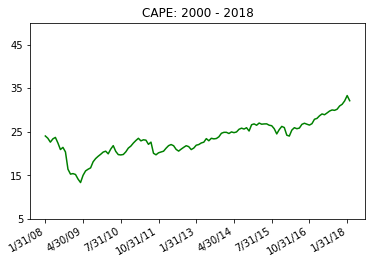

In [62]:
plt.plot(x, y, c = 'or')                                     # Plot
axes = plt.gca()                                                # Define axes
plt.ylim(8, 50)                                                 # Set y axis limits
plt.gcf().autofmt_xdate()                                       # beautify the x-labels
# Adjust axis scales
axes.set_yticks(axes.get_yticks()[::2])
axes.set_xticks(axes.get_xticks()[::15])

#Label graph, and show:
plt.title('CAPE: 2000 - 2018')
plt.show()


In [63]:
#Provide summary stats to benchmark index selection:
print("Summary Stats (CAPE)")
print("min", numpy.min(y))
print("max", numpy.max(y))
print("std", numpy.std(y))
print("mean", numpy.mean(y))
print("median", numpy.median(y))

Summary Stats (CAPE)
min 13.32366766
max 33.30734383
std 3.968825529864398
mean 23.390759648524586
median 23.356344865


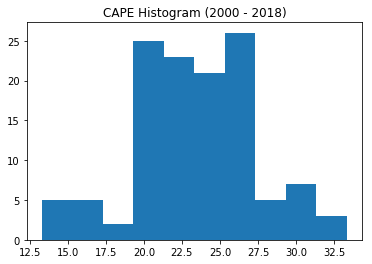

In [64]:
#Show Histogram of CAPE for past 18 Years:
plt.hist(y, bins='auto', orientation='vertical')
plt.title('CAPE Histogram (2000 - 2018)')
plt.show()

In [65]:
#Onto to the Smart BETA selection process:

In [66]:
#import the stock dataset, convert to csv, and read csv for analysis:
df1 = pd.read_csv('stocks.csv')

In [67]:
company = df1['ticker'].values
pe = df1['pe_ratio_12m'].values               #Focus on TTM P/E for robustness
print('P/E Set:', pe)

P/E Set: [18.14 15.24 25.71 18.25 18.85 26.56 15.63 14.18 10.51 23.54 10.16 15.03
 15.86 13.74 21.89 22.98 20.58 14.07 26.28 30.7  13.08 17.93 16.94 22.53
 18.   32.83 12.14 18.11 21.31]


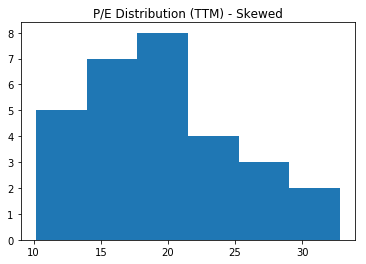

In [68]:
#More data visualization:
plt.hist(pe, bins='auto', orientation='vertical')
plt.title('P/E Distribution (TTM) - Skewed')
plt.show()

In [69]:
#Derive summary data to compare against CAPE analysis:
print("Summary Stats (P/E):")
print("p/e median:", numpy.median(pe))
print("p/e min:", numpy.min(pe))
print("p/e max:", numpy.max(pe))
print("p/e std:", numpy.std(pe))
print("p/e mean:", numpy.mean(pe))

Summary Stats (P/E):
p/e median: 18.11
p/e min: 10.16
p/e max: 32.83
p/e std: 5.618895080554382
p/e mean: 18.992068965517237


In [70]:
#Define the "value" bands. Adjust st.dev. range in proportion to dateset size:
beta_band = int(1*numpy.std(pe) + numpy.mean(pe))
alpha_band = int(numpy.mean(pe) - 1*numpy.std(pe))

In [71]:
print("sell any stock with P/E above:", beta_band)
print("buy any stock with P/E below:", alpha_band)


sell any stock with P/E above: 24
buy any stock with P/E below: 13


In [72]:
min = int(numpy.min(pe))
max = int(numpy.max(pe))

In [73]:
#Finally select members for the long/short for the Smart BETA ETF/Index:
for pe in range(min, alpha_band):
    print("buy these", company)
#print('')
#for pe in range(beta_band, max):
 #   print("sell these", company)

buy these ['AAPL' 'AXP' 'BA' 'CAT' 'CSCO' 'CVX' 'DIS' 'GE' 'GS' 'HD' 'IBM' 'INTC'
 'JNJ' 'JPM' 'KO' 'MCD' 'MMM' 'MRK' 'MSFT' 'NKE' 'PFE' 'PG' 'TRV' 'UNH'
 'UTX' 'V' 'VZ' 'WMT' 'XOM']
buy these ['AAPL' 'AXP' 'BA' 'CAT' 'CSCO' 'CVX' 'DIS' 'GE' 'GS' 'HD' 'IBM' 'INTC'
 'JNJ' 'JPM' 'KO' 'MCD' 'MMM' 'MRK' 'MSFT' 'NKE' 'PFE' 'PG' 'TRV' 'UNH'
 'UTX' 'V' 'VZ' 'WMT' 'XOM']
buy these ['AAPL' 'AXP' 'BA' 'CAT' 'CSCO' 'CVX' 'DIS' 'GE' 'GS' 'HD' 'IBM' 'INTC'
 'JNJ' 'JPM' 'KO' 'MCD' 'MMM' 'MRK' 'MSFT' 'NKE' 'PFE' 'PG' 'TRV' 'UNH'
 'UTX' 'V' 'VZ' 'WMT' 'XOM']
